# **Import Libraries**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score,roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
#from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

# **Load the Data**

In [60]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Explore the Data**

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [62]:
df.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [63]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [64]:
df.shape

(7043, 21)

In [65]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [67]:
#Understanding Churn Rate
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

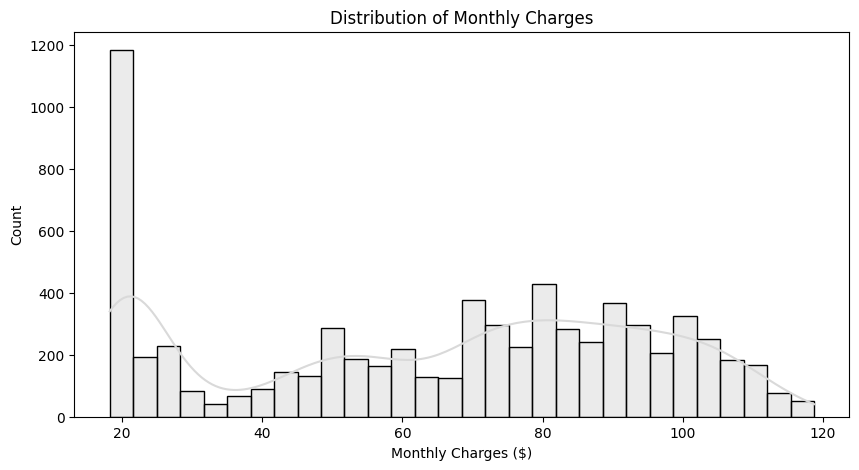

In [58]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='#d9d9d9')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()

In [68]:
bins=[0,30,70,df['MonthlyCharges'].max()]
labels=['Low','Mid','High']
df['MonthlyCharges_Category']=pd.cut(df['MonthlyCharges'],bins=bins,labels=labels)
churn_rate=df.groupby('MonthlyCharges_Category')['Churn'].value_counts(normalize=True).unstack()
churn_rate

Churn,No,Yes
MonthlyCharges_Category,,
Low,0.901996,0.098004
Mid,0.756502,0.243498
High,0.646386,0.353614


In [70]:
numerical_features=df.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [71]:
df.dtypes

customerID                   object
gender                       object
SeniorCitizen                 int64
Partner                      object
Dependents                   object
tenure                        int64
PhoneService                 object
MultipleLines                object
InternetService              object
OnlineSecurity               object
OnlineBackup                 object
DeviceProtection             object
TechSupport                  object
StreamingTV                  object
StreamingMovies              object
Contract                     object
PaperlessBilling             object
PaymentMethod                object
MonthlyCharges              float64
TotalCharges                 object
Churn                        object
MonthlyCharges_Category    category
dtype: object

In [72]:
df['TotalCharges']=df.apply(lambda x: x['MonthlyCharges'] if x['TotalCharges'] == ' ' else x['TotalCharges'], axis=1)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
print(df['TotalCharges'].isnull().sum())

0


In [73]:
df.dtypes

customerID                   object
gender                       object
SeniorCitizen                 int64
Partner                      object
Dependents                   object
tenure                        int64
PhoneService                 object
MultipleLines                object
InternetService              object
OnlineSecurity               object
OnlineBackup                 object
DeviceProtection             object
TechSupport                  object
StreamingTV                  object
StreamingMovies              object
Contract                     object
PaperlessBilling             object
PaymentMethod                object
MonthlyCharges              float64
TotalCharges                float64
Churn                        object
MonthlyCharges_Category    category
dtype: object

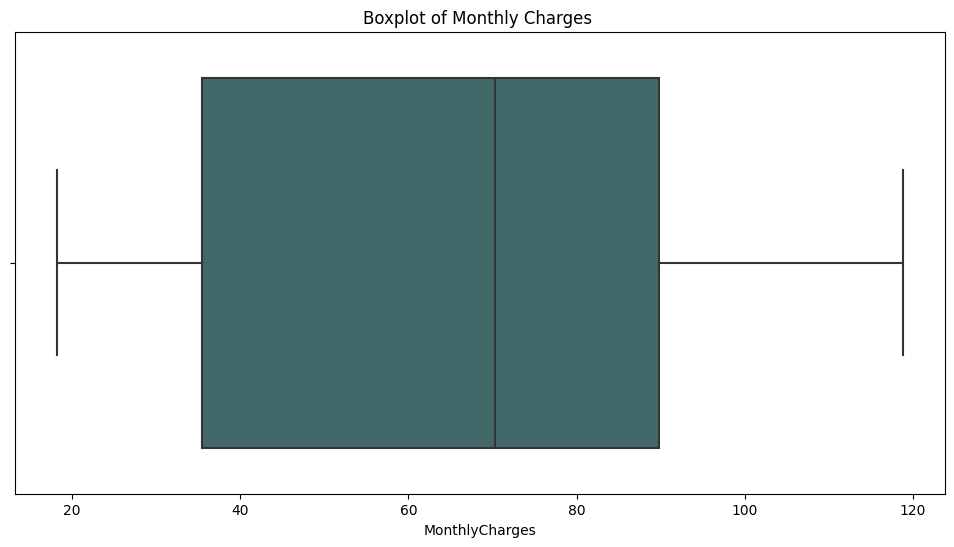

In [74]:
#Check Outliers Using Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='MonthlyCharges',palette=['#3c6e71','#d9d9d9'])
plt.title('Boxplot of Monthly Charges ')
plt.show()

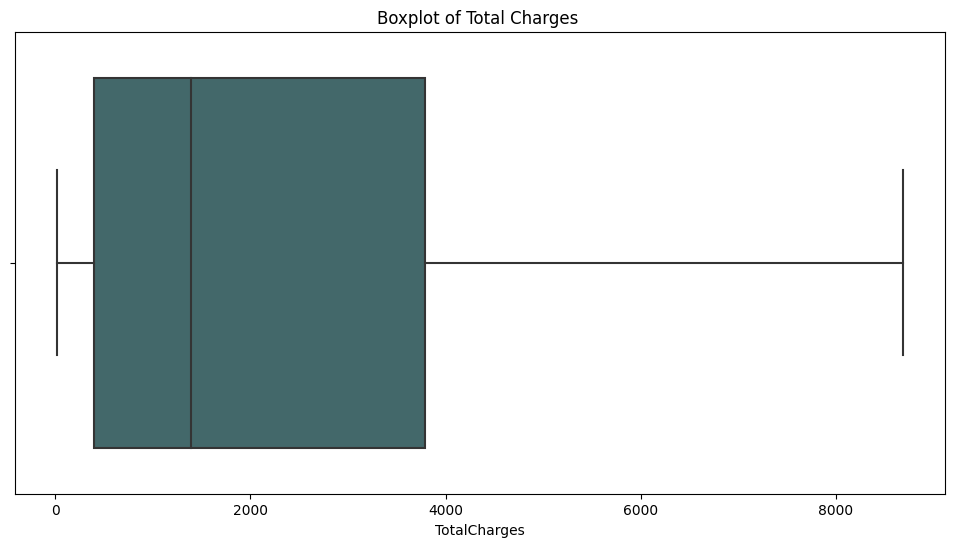

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='TotalCharges',palette=['#3c6e71','#d9d9d9'])
plt.title('Boxplot of Total Charges ')
plt.show()

## **Data Preprocessing**

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customerID               7043 non-null   object  
 1   gender                   7043 non-null   object  
 2   SeniorCitizen            7043 non-null   int64   
 3   Partner                  7043 non-null   object  
 4   Dependents               7043 non-null   object  
 5   tenure                   7043 non-null   int64   
 6   PhoneService             7043 non-null   object  
 7   MultipleLines            7043 non-null   object  
 8   InternetService          7043 non-null   object  
 9   OnlineSecurity           7043 non-null   object  
 10  OnlineBackup             7043 non-null   object  
 11  DeviceProtection         7043 non-null   object  
 12  TechSupport              7043 non-null   object  
 13  StreamingTV              7043 non-null   object  
 14  Streamin

In [77]:
df.drop(['customerID'],axis=1,inplace=True)

In [78]:
#Label encoding of target column
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [79]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,Mid
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Mid


# Encoding Categorical Cetaures

In [80]:
df['MonthlyCharges_Category']=df['MonthlyCharges_Category'].replace({'Low':0,'Mid':1,'High':2})

In [84]:
categorical_cols=df.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [82]:
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,1
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,1
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,2


# **Spliting the data**

In [85]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [86]:
#Handeling Imbalanced Using SMOTE
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

In [87]:
#Splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [88]:
#Feature Scalling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train_smote=scaler.fit_transform(X_train_smote)
X_test_smote=scaler.transform(X_test_smote)

In [89]:
#dic of models
models={
    "Random Forest": RandomForestClassifier(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVC': SVC(random_state=42,probability=True) ,
    'KNN': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(random_state=42)
}

Results on original data
Random Forest - Accuracy: 0.7999, AUC-ROC: 0.6949
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

--------------------------------------------------


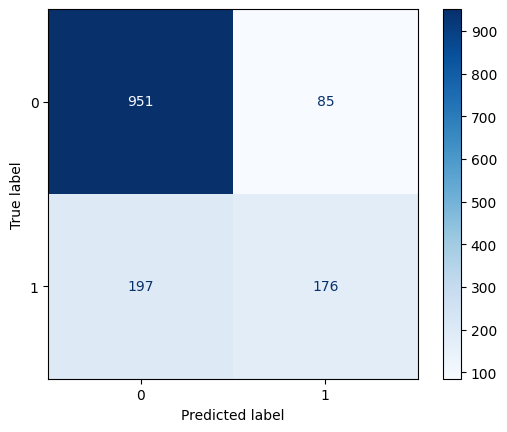

DecisionTreeClassifier - Accuracy: 0.7289, AUC-ROC: 0.6561
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.49      0.50      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409

--------------------------------------------------


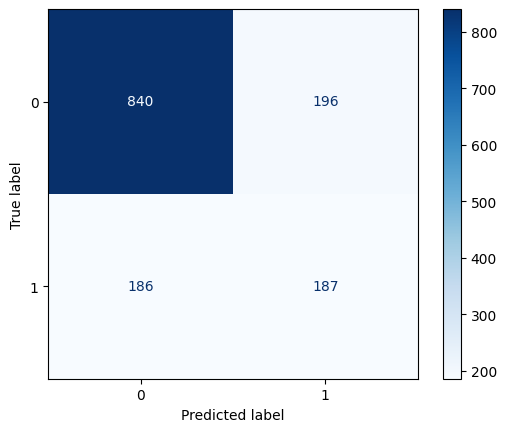

Logistic Regression - Accuracy: 0.8148, AUC-ROC: 0.7394
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

--------------------------------------------------


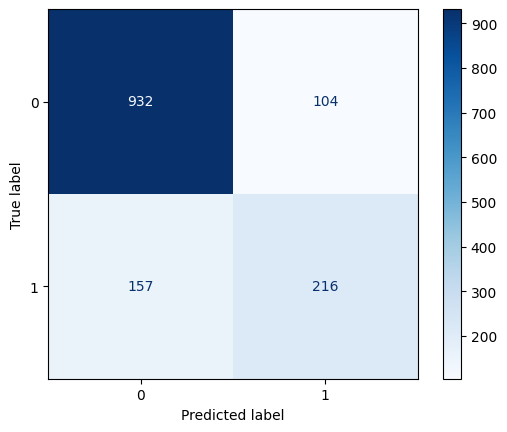

SVC - Accuracy: 0.8070, AUC-ROC: 0.7109
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

--------------------------------------------------


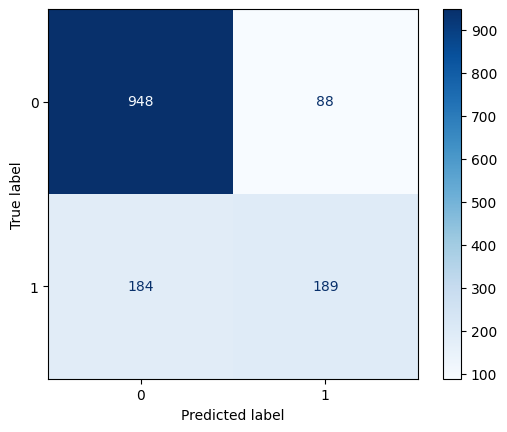

KNN - Accuracy: 0.7587, AUC-ROC: 0.6763
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.55      0.50      0.52       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409

--------------------------------------------------


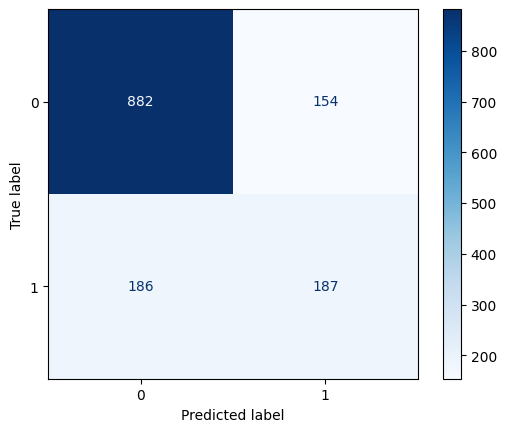

XGBClassifier - Accuracy: 0.7956, AUC-ROC: 0.7074
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.52      0.57       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

--------------------------------------------------


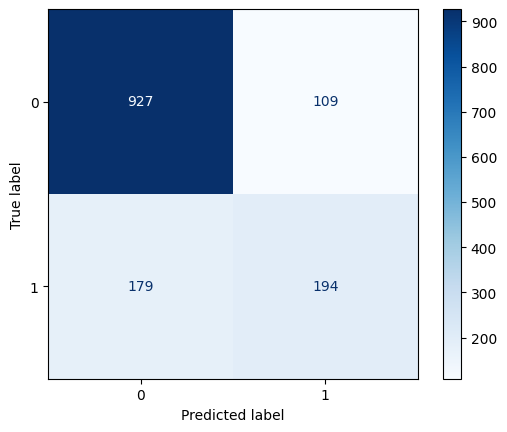

In [90]:
results = []

# Train models and store results
print("Results on original data")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC-ROC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Append results to the list
    results.append([name, accuracy, 'Original'])


**Synthetic Minority Oversampling TEchnique (SMOTE)**

In [91]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
X_train_smote = imputer.fit_transform(X_train_smote)
X_test_smote = imputer.transform(X_test_smote)

Results on SMOTE Data
Random Forest - Accuracy: 0.8551, AUC-ROC: 0.9307
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1021
           1       0.86      0.85      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

--------------------------------------------------


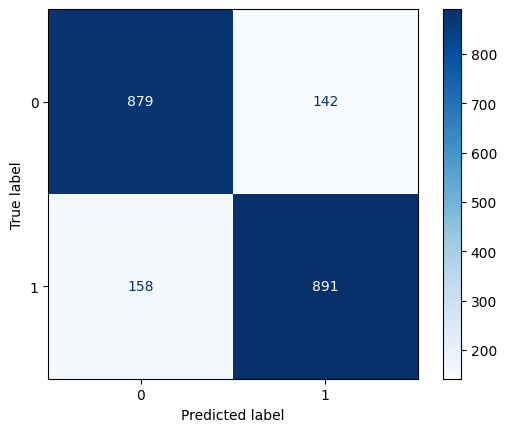

DecisionTreeClassifier - Accuracy: 0.7981, AUC-ROC: 0.7977
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1021
           1       0.80      0.80      0.80      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

--------------------------------------------------


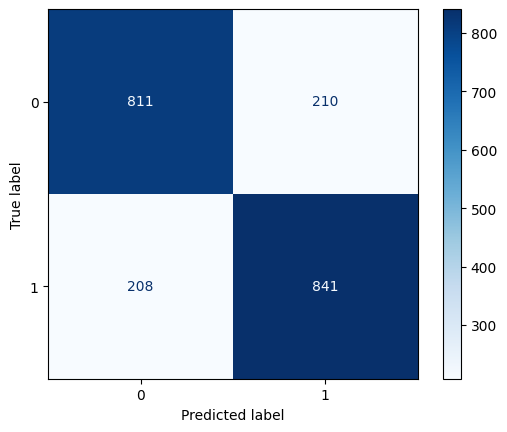

Logistic Regression - Accuracy: 0.8135, AUC-ROC: 0.8957
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1021
           1       0.80      0.85      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070

--------------------------------------------------


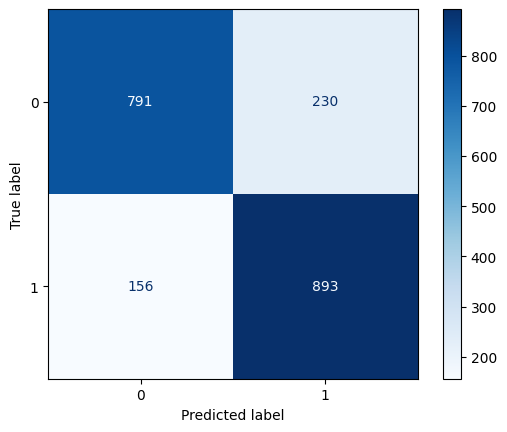

SVC - Accuracy: 0.8357, AUC-ROC: 0.9146
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1021
           1       0.84      0.84      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

--------------------------------------------------


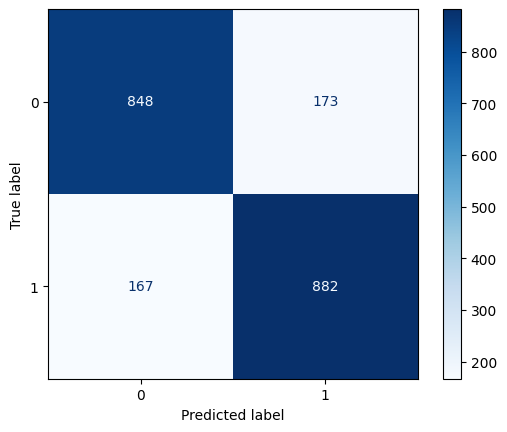

KNN - Accuracy: 0.8024, AUC-ROC: 0.8770
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1021
           1       0.77      0.86      0.82      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070

--------------------------------------------------


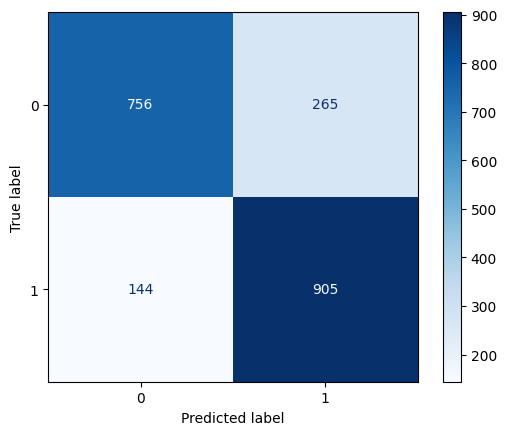

XGBClassifier - Accuracy: 0.8522, AUC-ROC: 0.9292
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1021
           1       0.85      0.86      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

--------------------------------------------------


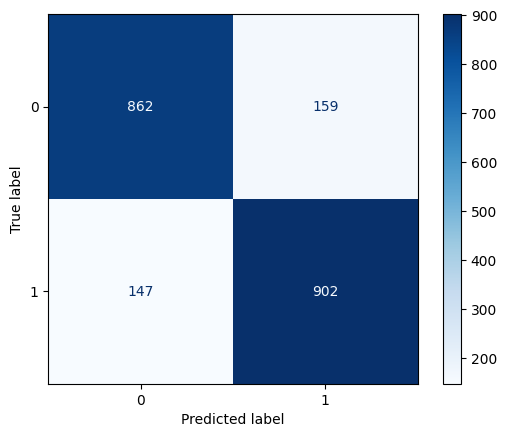

In [92]:
# Training and Evaluating Models on SMOTE Data
print("Results on SMOTE Data")
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test_smote)
    accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
    roc_auc_smote = roc_auc_score(y_test_smote, model.predict_proba(X_test_smote)[:, 1])
    print(f"{name} - Accuracy: {accuracy_smote:.4f}, AUC-ROC: {roc_auc_smote:.4f}")
    print(classification_report(y_test_smote, y_pred_smote))
    print("-" * 50)
    cm = confusion_matrix(y_test_smote,y_pred_smote)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Append results to the list
    results.append([name, accuracy_smote, 'SMOTE'])

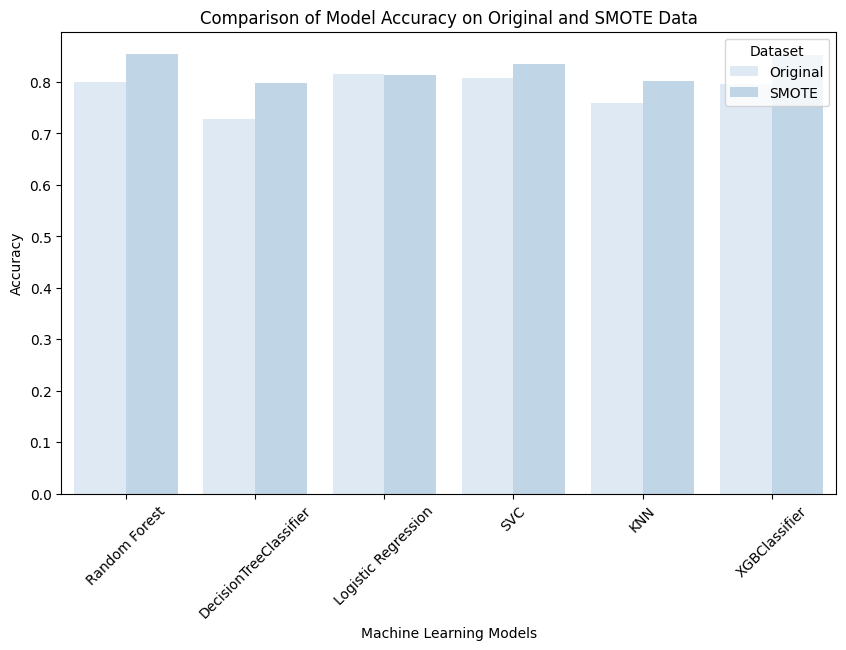

In [93]:
# Create the DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Dataset"])

# Visualization of Model Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", hue="Dataset", data=results_df)
plt.xticks(rotation=45)
plt.title("Comparison of Model Accuracy on Original and SMOTE Data")
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Models")
plt.legend(title="Dataset")
plt.show()

In [94]:
# Hyperparameter Tuning for Best Model (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [95]:
print("Best Random Forest Model:", grid_search.best_params_)
y_pred_best = grid_search.best_estimator_.predict(X_test_smote)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test_smote, y_pred_best))

Best Random Forest Model: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.8589371980676328


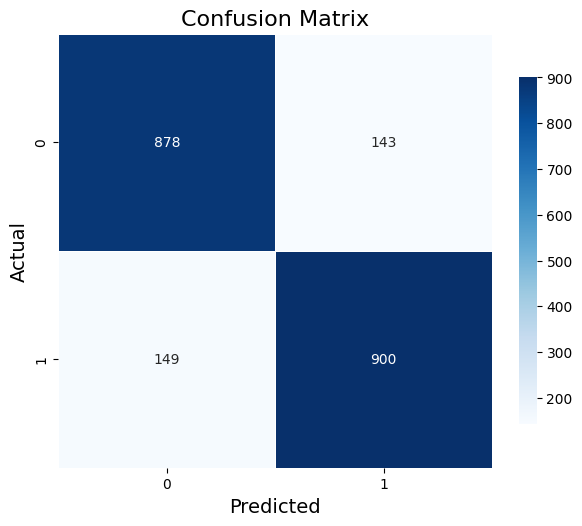

In [96]:
#visulize best
cm = confusion_matrix(y_test_smote, y_pred_best)
sns.set_palette("Blues")
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})
# Customizing labels
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
# Show the plot
plt.show()